# Speed of patterns study
This is a notebook to study the effects of different parameters in how long the pattern stays active for recall. In general compare the time of the sequence and recall.

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git Machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '1e99cfe7b1982691a0212334a93d58057df83d56'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Load libraries

In [3]:
from network import BCPNN, NetworkManager, BCPNNFast, Protocol
from data_transformer import build_ortogonal_patterns

from plotting_functions import plot_winning_pattern, plot_sequence
from analysis_functions import calculate_compression_factor

### Epochs range

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

epochs_range = np.arange(1, 10, 1, dtype='int')
compression_list = []
exclude_extrema = False

for epochs in epochs_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [0, 1, 2, 3, 4, 5]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

../analysis_functions.py:43: RuntimeWarning: invalid value encountered in double_scalars
  dis = [a / b for (a, b) in zip(nominator, denominator)]


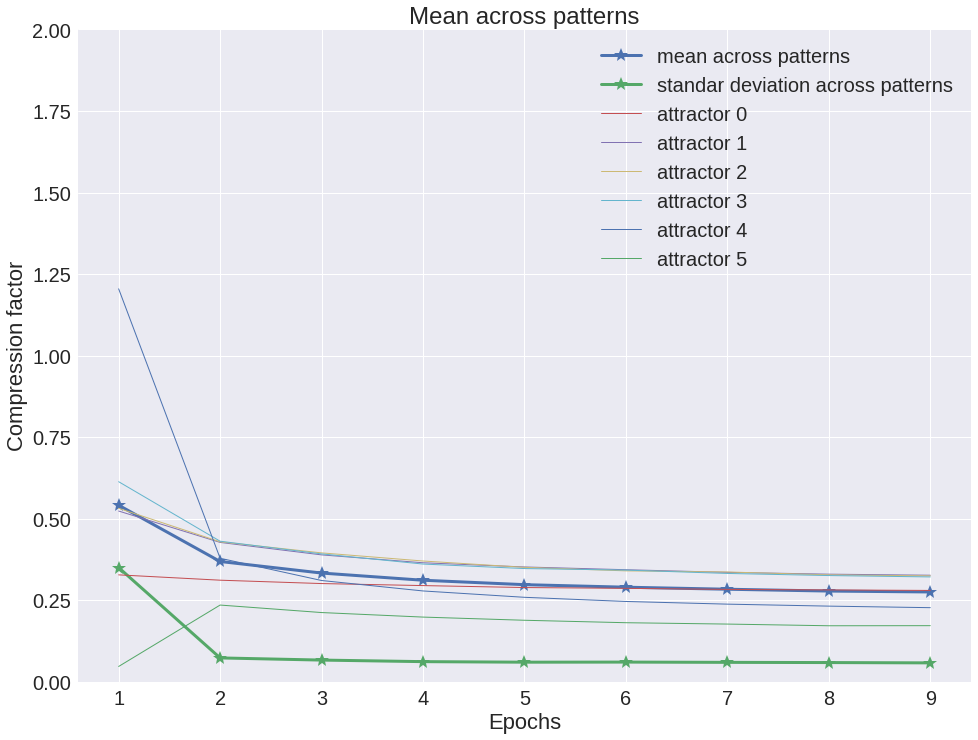

In [5]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(epochs_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(epochs_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')
for index, x in enumerate(compression_list.T):
    ax.plot(epochs_range, x, '-', linewidth=1.0, label='attractor ' + str(index))


ax.set_xlabel('Epochs')
ax.set_ylabel('Compression factor')
ax.set_title('Mean across patterns')

ax.legend()
ax.set_ylim(0, 2.0);

#### Training time

In [6]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

training_times = np.arange(0.100, 0.550, 0.025)
compression_list = []
exclude_extrema = True

for training_time in training_times:
    # Protocol
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [0, 1, 2, 3, 4, 5]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)

    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

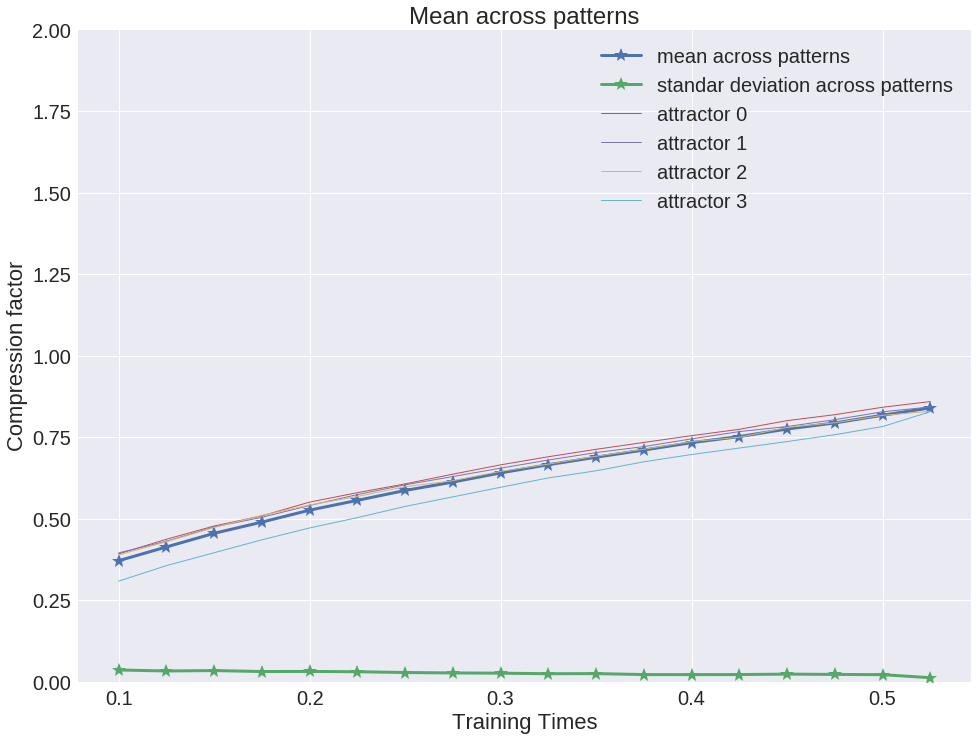

In [7]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(training_times, means, '*-', markersize=14,linewidth=3.0, label='mean across patterns')
ax.plot(training_times, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(training_times, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('Training Times')
ax.set_ylabel('Compression factor')
ax.set_title('Mean across patterns')


ax.legend()
ax.set_ylim(0, 2.0);

Above trainig times of **0.5 secondsthe network does not recall the sequence correctly** so I do not show this range.

#### Minicolumns

In [8]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

minicolumns_range = np.arange(10, 55, 5)
compression_list = []
exclude_extrema = False

for minicolumns in minicolumns_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [0, 1, 2, 3, 4, 5]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

In [9]:
print(compression_list.shape)
minicolumns_range.shape

(9, 6)


(9,)

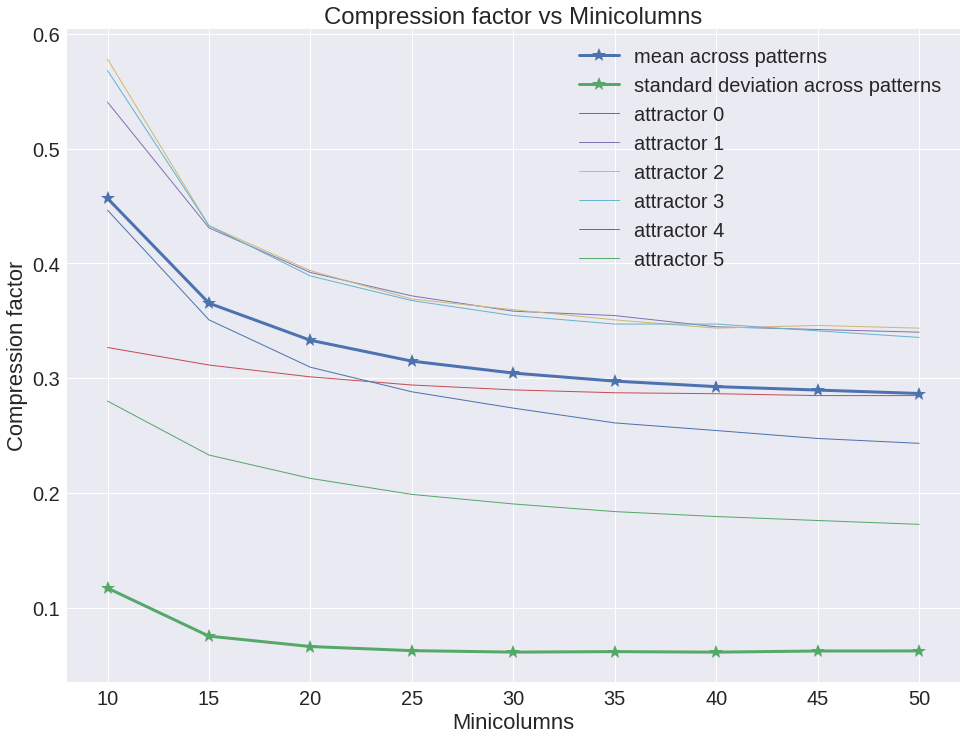

In [10]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(minicolumns_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(minicolumns_range, std, '*-', markersize=14, linewidth=3.0, label='standard deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(minicolumns_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('Minicolumns')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs Minicolumns')


ax.legend()
# ax.set_ylim(0, 2.0);

#### Hypercolumns

In [11]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
exclude_extrema = False

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

hypercolumns_range = np.arange(4, 24, 4)
compression_list = []

for hypercolums in hypercolumns_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [0, 1, 2, 3, 4, 5]
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

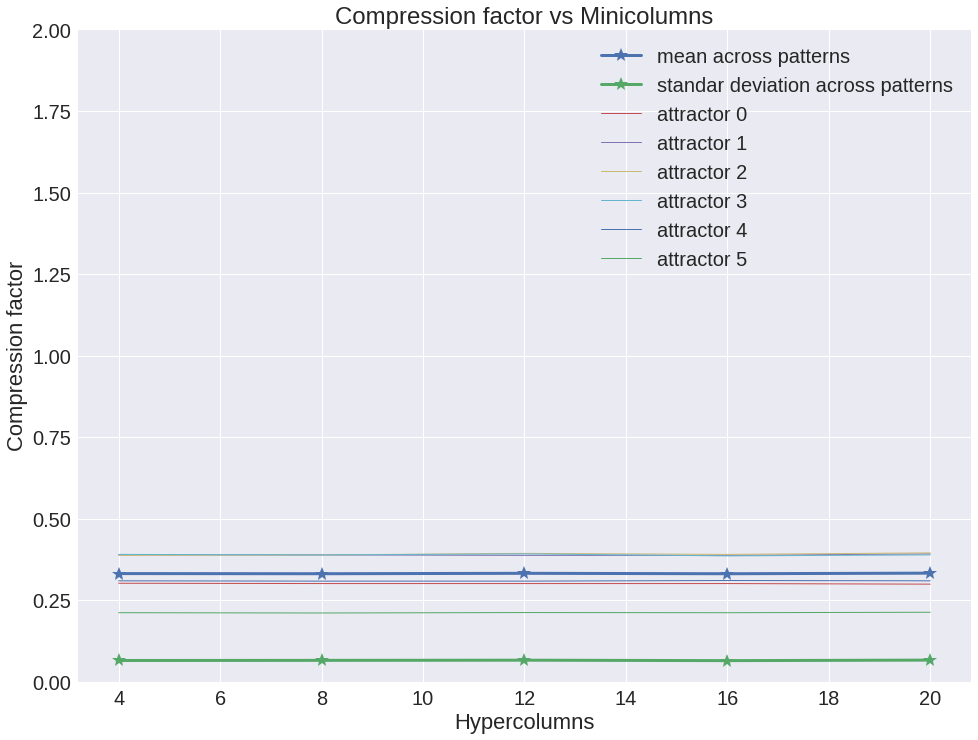

In [12]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(hypercolumns_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(hypercolumns_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(hypercolumns_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('Hypercolumns')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs Minicolumns')


ax.legend()
ax.set_ylim(0, 2.0);

#### Number of patterns

In [13]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
exclude_extrema = False

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

number_of_patterns_range = np.arange(3, 7, 2)
compression_list = []

for number_of_patterns in number_of_patterns_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [x for x in range(number_of_patterns)]
    print(patterns)
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

[0, 1, 2]
[0, 1, 2, 3, 4]


IndexError: tuple index out of range

In [ ]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(number_of_patterns_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(number_of_patterns_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(number_of_patterns_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('Number of patterns')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs Number of patterns')


ax.legend()
ax.set_ylim(0, 2.0);

#### Time constants

In [ ]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
exclude_extrema = False

# Manager properties
dt = 0.001
T_recall = 3.0
values_to_save = ['o']

tau_z_pre_range = np.arange(0.100, 0.050, 0.400)
compression_list = []

for tau_z_pre in tau_z_pre_range:
    # Protocol
    training_time = 0.1
    inter_sequence_interval = 1.0
    inter_pulse_interval = 0.0
    epochs = 3

    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre)
    print(nn.tau_z_pre)
    nn.k_inner = False

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for
    patterns = [x for x in range(number_of_patterns)]
    print(patterns)
    protocol = Protocol()
    protocol.simple_protocol(patterns_indexes=patterns, training_time=training_time,
                             inter_pulse_interval=inter_pulse_interval, inter_sequence_interval=inter_sequence_interval,
                             epochs=epochs)


    # Train
    manager.run_network_protocol(protocol, verbose=False, values_to_save_epoch=None, reset=True, empty_history=True)

    manager.run_network_recall(T_recall=T_recall, T_cue=0.1, I_cue=0, reset=True, empty_history=True)

    compression = calculate_compression_factor(manager, training_time=training_time, 
                                               exclude_extrema=exclude_extrema)
    compression_list.append(compression)

compression_list = np.array(compression_list)
means = np.mean(compression_list, axis=1)
std = np.std(compression_list, axis=1)

In [ ]:
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_z_pre_range, means, '*-', markersize=14, linewidth=3.0, label='mean across patterns')
ax.plot(tau_z_pre_range, std, '*-', markersize=14, linewidth=3.0, label='standar deviation across patterns')

for index, x in enumerate(compression_list.T):
    ax.plot(tau_z_pre_range, x, '-', linewidth=1.0, label='attractor ' + str(index))

ax.set_xlabel('tau_z_pre')
ax.set_ylabel('Compression factor')
ax.set_title('Compression factor vs tau_z_pre')


ax.legend()
ax.set_ylim(0, 2.0);

#### Adaptation time constant